In [31]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [32]:
housing = pd.read_csv('USA_Housing.csv')

In [33]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [34]:
housing.info()
housing.describe()
housing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

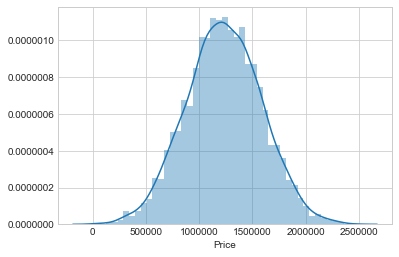

In [35]:
#check the distribution of the target column
sns.distplot(housing['Price'])

We see a normal distribution in the Price data which is good. This indicates the sample is good.

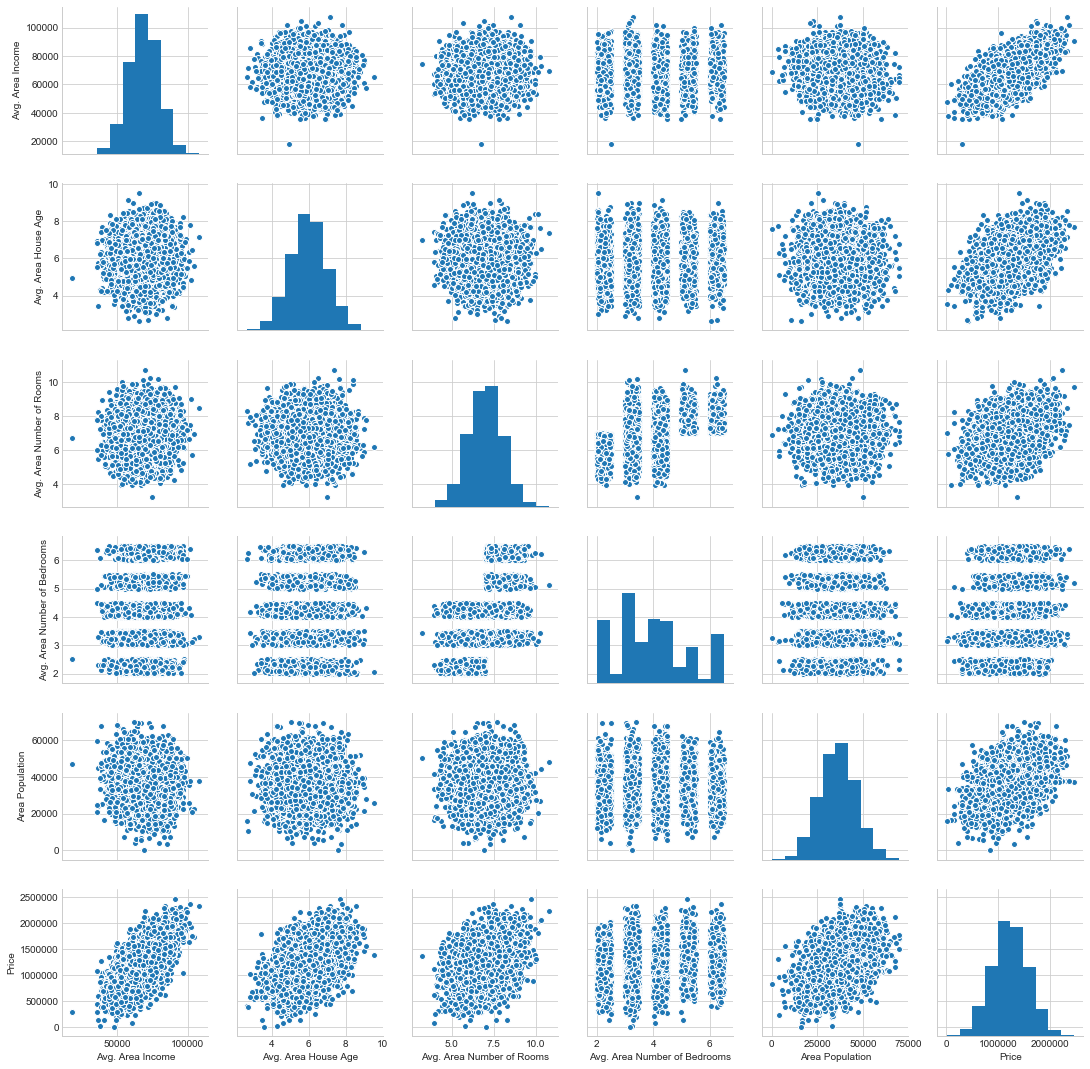

In [36]:
sns.pairplot(housing)

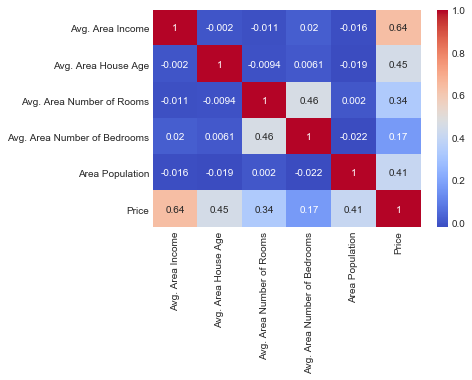

In [37]:
sns.heatmap(housing.corr(),annot=True,cmap='coolwarm')

Lets start with Linear Regression. 
First we need to split our X and y Vairables

In [38]:
X=housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y=housing['Price']

In [39]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.4,random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lm.coef_
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coeffs'])
coeffs

,Coeffs
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [42]:
predictions=lm.predict(X_Test)

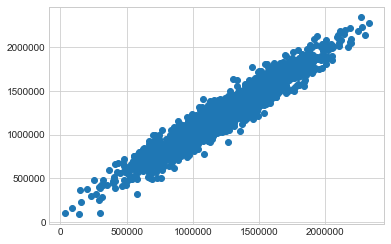

In [43]:
plt.scatter(y_Test,predictions)

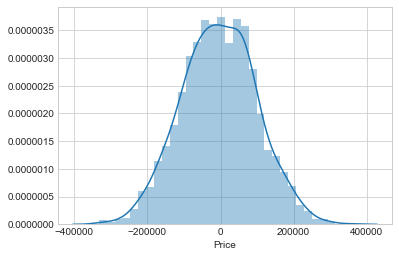

In [44]:
# create a hist of residuals
sns.distplot(y_Test-predictions)

In [45]:
# evaluation for the Linear model
# MAE , MSE , RMSE

In [46]:
from sklearn import metrics

In [47]:
print("MAE is: ", metrics.mean_absolute_error(y_Test,predictions))
print("MSE is: ", metrics.mean_squared_error(y_Test,predictions))
print("RMSE is: ", np.sqrt(metrics.mean_squared_error(y_Test,predictions)))

MAE is:  82288.22251914957
MSE is:  10460958907.209501
RMSE is:  102278.82922291153
